## Baseline danger metric
Development of baseline danger metric for a bike ride

In [28]:
import pandas as pd
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt

In [1]:
CRASHES_FILEPATH = "../../data/Motor_Vehicle_Collisions_-_Crashes.csv"

In [17]:
crashes_df = pd.read_csv(CRASHES_FILEPATH)

/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
crashes_df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [18]:
# Let's just look at Manhattan
crashes_df = crashes_df[crashes_df["BOROUGH"] == "MANHATTAN"]

In [19]:
crashes_df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
30,04/16/2021,21:20,MANHATTAN,10025.0,40.793350,-73.972750,"(40.79335, -73.97275)",WEST 94 STREET,BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,4407958,Sedan,NaN,NaN,NaN,NaN
31,04/16/2021,17:20,MANHATTAN,10012.0,40.725380,-74.000110,"(40.72538, -74.00011)",PRINCE STREET,WOOSTER STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
70,04/16/2021,20:55,MANHATTAN,10032.0,40.841717,-73.944350,"(40.841717, -73.94435)",NaN,NaN,1051 RIVERSIDE DRIVE,...,Unspecified,NaN,NaN,NaN,4408280,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
80,04/15/2021,22:25,MANHATTAN,10036.0,40.760822,-73.998320,"(40.760822, -73.99832)",WEST 42 STREET,11 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4407830,Sedan,NaN,NaN,NaN,NaN
81,04/14/2021,10:09,MANHATTAN,10016.0,40.746080,-73.974945,"(40.74608, -73.974945)",2 AVENUE,EAST 36 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407282,Tow Truck / Wrecker,Dump,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837026,07/08/2012,22:14,MANHATTAN,10036.0,40.758429,-73.992633,"(40.7584292, -73.9926328)",WEST 42 STREET,9 AVENUE,NaN,...,Turning Improperly,NaN,NaN,NaN,26144,BUS,TAXI,NaN,NaN,NaN
1837029,07/01/2012,21:12,MANHATTAN,10020.0,40.759899,-73.980425,"(40.7598989, -73.9804246)",AVENUE OF THE AMERICAS,WEST 50 STREET,NaN,...,Lost Consciousness,NaN,NaN,NaN,37643,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
1837031,07/09/2012,11:15,MANHATTAN,10028.0,40.775292,-73.953626,"(40.775292, -73.9536264)",EAST 82 STREET,2 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,44985,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1837038,07/06/2012,23:05,MANHATTAN,10019.0,40.762342,-73.982352,"(40.7623421, -73.9823516)",WEST 52 STREET,7 AVENUE,NaN,...,Lost Consciousness,NaN,NaN,NaN,37696,PICK-UP TRUCK,VAN,NaN,NaN,NaN


In [21]:
crashes_df[crashes_df["VEHICLE TYPE CODE 1"] == "BICYCLE"]

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1074997,03/03/2016,17:22,MANHATTAN,10018.0,40.755251,-73.998661,"(40.755251, -73.9986609)",10 AVENUE,WEST 35 STREET,NaN,...,Turning Improperly,NaN,NaN,NaN,3399193,BICYCLE,UNKNOWN,NaN,NaN,NaN
1078193,02/17/2016,11:25,MANHATTAN,10028.0,40.779540,-73.959772,"(40.7795404, -73.9597725)",EAST 84 STREET,MADISON AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3389976,BICYCLE,LIVERY VEHICLE,NaN,NaN,NaN
1087858,01/28/2016,15:50,MANHATTAN,10003.0,40.733526,-73.989868,"(40.7335259, -73.989868)",4 AVENUE,EAST 13 STREET,NaN,...,NaN,NaN,NaN,NaN,3379422,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1105478,12/24/2015,13:40,MANHATTAN,10003.0,40.730592,-73.992408,"(40.7305919, -73.9924085)",BROADWAY,EAST 8 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,3359245,BICYCLE,UNKNOWN,BUS,NaN,NaN
1116498,11/24/2015,11:40,MANHATTAN,10013.0,40.717931,-74.000988,"(40.7179306, -74.0009884)",WALKER STREET,LAFAYETTE STREET,NaN,...,Unspecified,NaN,NaN,NaN,3341124,BICYCLE,UNKNOWN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799953,09/04/2012,20:50,MANHATTAN,10003,40.732348,-73.984939,"(40.7323478, -73.9849394)",2 AVENUE,EAST 14 STREET,NaN,...,Unspecified,NaN,NaN,NaN,22132,BICYCLE,UNKNOWN,NaN,NaN,NaN
1813528,08/11/2012,1:00,MANHATTAN,10002,40.722242,-73.986287,"(40.7222418, -73.9862873)",EAST HOUSTON STREET,AVENUE A,NaN,...,Unspecified,NaN,NaN,NaN,14153,BICYCLE,UNKNOWN,NaN,NaN,NaN
1816069,08/09/2012,16:40,MANHATTAN,10017,40.752815,-73.981372,"(40.7528149, -73.9813723)",EAST 41 STREET,5 AVENUE,NaN,...,Traffic Control Disregarded,NaN,NaN,NaN,26447,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN
1818276,07/28/2012,2:40,MANHATTAN,10012,40.722355,-73.993261,"(40.722355, -73.9932609)",BOWERY,PRINCE STREET,NaN,...,Unspecified,NaN,NaN,NaN,5486,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [23]:
# Perfect, there was a crash at 84th and Mad. That's in the vincinity of where we want to start
crash = crashes_df.loc[1078193, :]

In [24]:
crash

CRASH DATE                                             02/17/2016
CRASH TIME                                                  11:25
BOROUGH                                                 MANHATTAN
ZIP CODE                                                  10028.0
LATITUDE                                                 40.77954
LONGITUDE                                              -73.959772
LOCATION                                (40.7795404, -73.9597725)
ON STREET NAME                   EAST 84 STREET                  
CROSS STREET NAME                MADISON AVENUE                  
OFF STREET NAME                                               NaN
NUMBER OF PERSONS INJURED                                     0.0
NUMBER OF PERSONS KILLED                                      0.0
NUMBER OF PEDESTRIANS INJURED                                   0
NUMBER OF PEDESTRIANS KILLED                                    0
NUMBER OF CYCLIST INJURED                                       0
NUMBER OF 

In [32]:
G = ox.graph_from_address("420 East 73rd Street, New York, New York 10021", network_type="bike", dist=1500)


/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


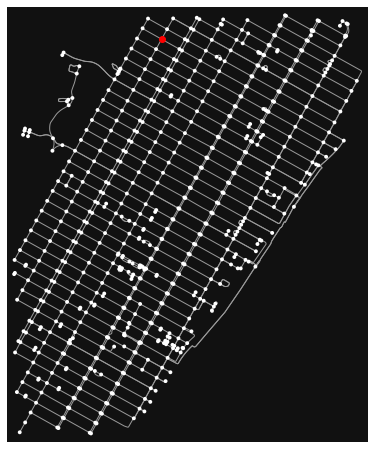

In [33]:
# Plot a crash on our bike network
fig, ax = ox.plot_graph(G, show=False, close=False)
ax.scatter(crash["LONGITUDE"], crash["LATITUDE"], c='red')
plt.show()

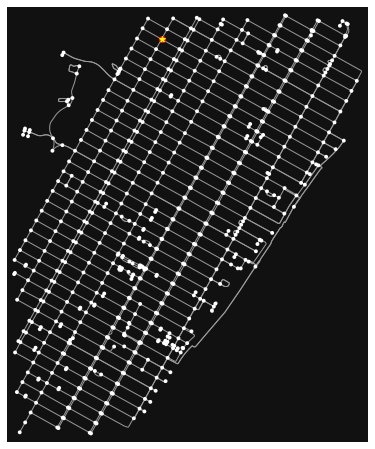

In [44]:
# Get the node in our network closest to the crash
nearest_node = ox.distance.nearest_nodes(G, crash["LONGITUDE"], crash["LATITUDE"])
nearest_node_details = G.nodes[nearest_node]

fig, ax = ox.plot_graph(G, show=False, close=False)
ax.scatter(crash["LONGITUDE"], crash["LATITUDE"], c='red')
ax.scatter(nearest_node_details["x"], nearest_node_details["y"], c="yellow", marker="*")
plt.show()

In [43]:
G.nodes[42435499]

{'y': 40.779542,
 'x': -73.959774,
 'highway': 'traffic_signals',
 'street_count': 4}